<a href="https://colab.research.google.com/github/yogendra007-github/AIR-BNB-HOTEL-BOOKING-ANALYSIS/blob/main/yogendra_mishra_Source_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.set(style="whitegrid")

In [ ]:
try:
    df = pd.read_excel("Airbnb_Open_Data.xlsx")
    print("Dataset successfully loaded")
except FileNotFoundError:
    print("Error: 'Airbnb_Open_Data.xlsx - in.csv' file not found")
    exit()

Dataset successfully loaded


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
print(df.isnull().sum())

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [ ]:
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [ ]:
for col in ['price', 'service fee']:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col].str.replace(r'[$,]', '', regex=True), errors='coerce')

In [ ]:
df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12808\1073710818.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood group'].replace({'brookln': 'Brooklyn', 'manhatan': 'Manhattan'}, inplace=True)


In [ ]:
df.drop('license', axis=1, inplace=True)
df['reviews per month'].fillna(0, inplace=True)
df.dropna(subset=['price', 'host name'], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_12808\1484425456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['reviews per month'].fillna(0, inplace=True)


In [ ]:
# 1: Which hosts are the busiest and why?
busiest_hosts = df['host name'].value_counts().head(5)
busiest_hosts

host name
Michael         877
David           763
John            577
Alex            546
Sonder (NYC)    516
Name: count, dtype: int64

2. Verified vs. Unverified Hosts


C:\Users\hp\AppData\Local\Temp\ipykernel_12808\2068520145.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='host_identity_verified', palette='viridis')


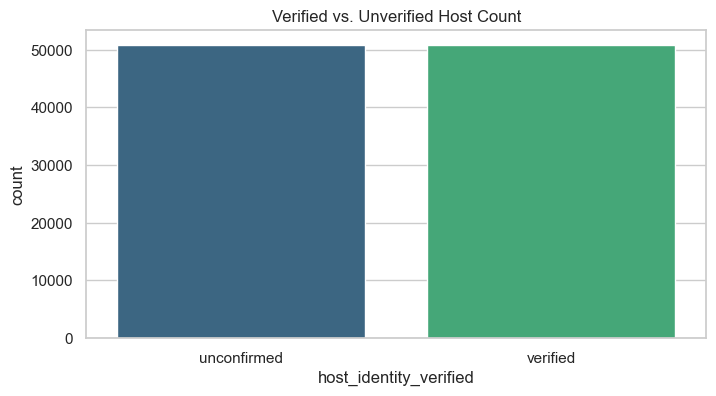

In [ ]:
# 2: How many verified and unverified hosts are there?
print("2. Verified vs. Unverified Hosts")
df['host_identity_verified'].value_counts()
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='host_identity_verified', palette='viridis')
plt.title('Verified vs. Unverified Host Count')
plt.show()

3. Most and Least Expensive Room Type (by Median Price)


C:\Users\hp\AppData\Local\Temp\ipykernel_12808\2225993145.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['price'] < 800], x='room type', y='price', palette='magma') # Filter for better viz


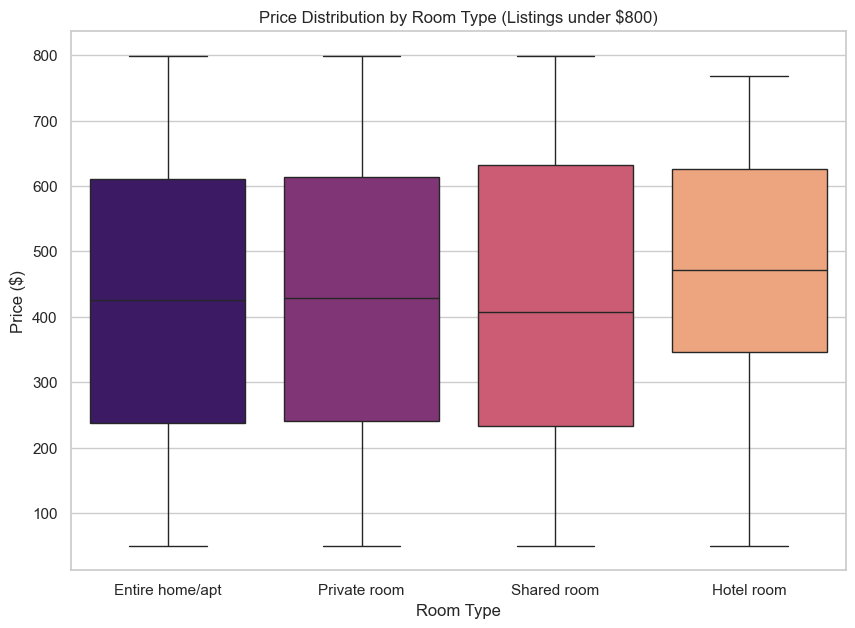

room type
Shared room        651.0
Hotel room         644.5
Entire home/apt    624.0
Private room       623.0
Name: price, dtype: float64
Most Expensive: Shared room
Least Expensive: Private room



In [ ]:
# 3: Which room type is the most expensive and cheap?
print("3. Most and Least Expensive Room Type (by Median Price)")
# Using median price is robust to extreme outliers
room_price_median = df.groupby('room type')['price'].median().sort_values(ascending=False)
print(room_price_median)
print(f"Most Expensive: {room_price_median.index[0]}")
print(f"Least Expensive: {room_price_median.index[-1]}\n")

4. Price Distribution


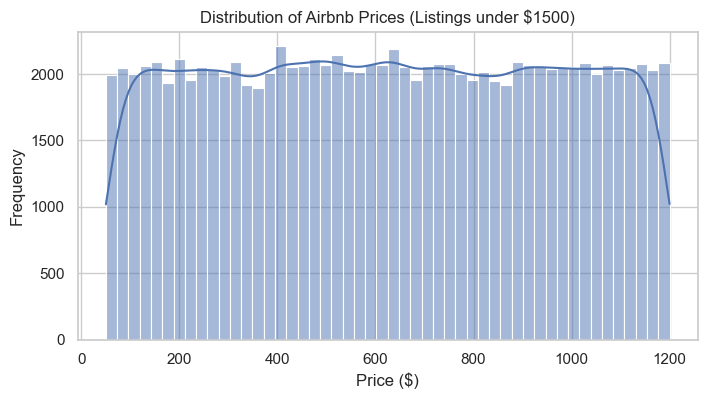

The graph shows that the majority of listings are priced between $50 and $250.



In [ ]:
# 4: How are the prices distributed?
print("4. Price Distribution")
plt.figure(figsize=(8, 4))
# Focusing on listings under $1500 for a clearer visualization
sns.histplot(df[df['price'] < 1500]['price'], bins=50, kde=True)
plt.title('Distribution of Airbnb Prices (Listings under $1500)')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()
print("The graph shows that the majority of listings are priced between $50 and $250.\n")

5. Top 10 Hosts with the Most Listings
host name
Michael         877
David           763
John            577
Alex            546
Sonder (NYC)    516
Daniel          473
Karen           437
Sarah           434
Maria           425
Anna            399
Name: id, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_12808\2396866276.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_hosts.values, y=top_10_hosts.index, palette='coolwarm')


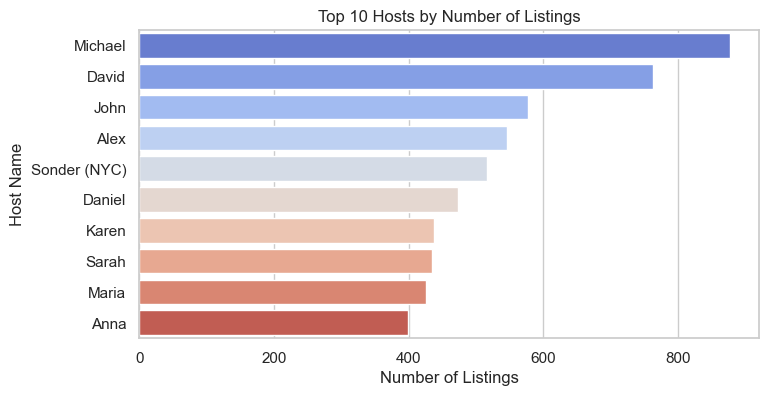

In [ ]:
# 5: Which are the top 10 hosts with the most listings?
print("5. Top 10 Hosts with the Most Listings")
top_10_hosts = df.groupby(['host name'])['id'].count().sort_values(ascending=False).head(10)
print(top_10_hosts)
# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_hosts.values, y=top_10_hosts.index, palette='coolwarm')
plt.title('Top 10 Hosts by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Host Name')
plt.show()

In [ ]:
# 6: How many different countries' data is there in the dataset?
print("6. Number of Countries in the Dataset")
num_countries = df['country'].nunique()
countries = df['country'].unique()
print(f"There is data from {num_countries} country in this dataset: {countries[0] if num_countries > 0 else 'N/A'}\n")

6. Number of Countries in the Dataset
There is data from 1 country in this dataset: United States



7. Top 10 Neighborhoods with the Most Listings
neighbourhood
Bedford-Stuyvesant    7892
Williamsburg          7729
Harlem                5426
Bushwick              4950
Hell's Kitchen        3945
Upper West Side       3828
Upper East Side       3656
East Village          3462
Midtown               3374
Crown Heights         3232
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_12808\422147091.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='plasma')


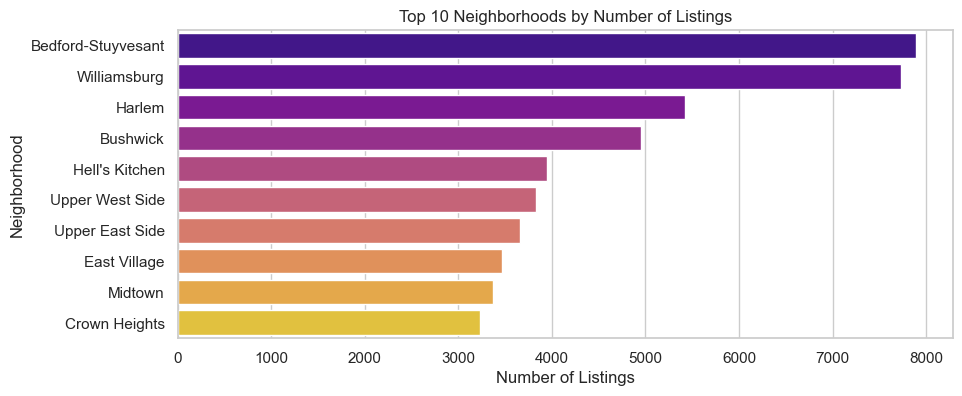

In [ ]:
# 7: Which are the top 10 neighborhoods with the most listings?
print("7. Top 10 Neighborhoods with the Most Listings")
top_10_neighborhoods = df['neighbourhood'].value_counts().head(10)
print(top_10_neighborhoods)
# Visualization
plt.figure(figsize=(10, 4))
sns.barplot(x=top_10_neighborhoods.values, y=top_10_neighborhoods.index, palette='plasma')
plt.title('Top 10 Neighborhoods by Number of Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()

8. Average Price per Room Type
room type
Hotel room         668.47
Shared room        634.19
Entire home/apt    625.22
Private room       624.85
Name: price, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_12808\924073790.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_room_type.index, y=avg_price_room_type.values, palette='magma')


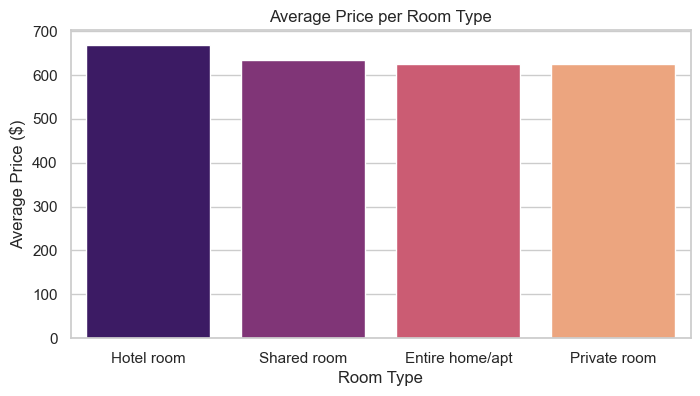

In [ ]:
# 8: What is the average price of each room type?
print("8. Average Price per Room Type")
avg_price_room_type = df.groupby('room type')['price'].mean().round(2).sort_values(ascending=False)
print(avg_price_room_type)
# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_price_room_type.index, y=avg_price_room_type.values, palette='magma')
plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price ($)')
plt.show()

9. Average Minimum Stay per Room Type
room type
Entire home/apt    9.81
Shared room        6.62
Private room       6.27
Hotel room         4.13
Name: minimum nights, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_12808\2011555127.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_min_nights.index, y=avg_min_nights.values, palette='cubehelix')


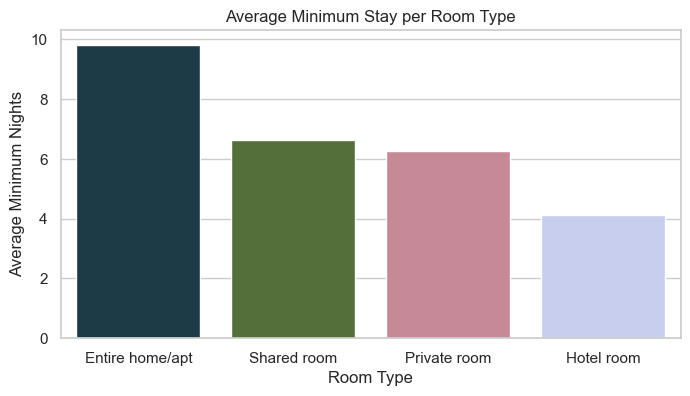

In [ ]:
# 9: Which room type has the longest minimum stay?
print("9. Average Minimum Stay per Room Type")
avg_min_nights = df.groupby('room type')['minimum nights'].mean().sort_values(ascending=False).round(2)
print(avg_min_nights)
# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=avg_min_nights.index, y=avg_min_nights.values, palette='cubehelix')
plt.title('Average Minimum Stay per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Minimum Nights')
plt.show()